In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [353]:
train_df = pd.read_csv('../project_2-master/datasets/train.csv')
test_df = pd.read_csv('../project_2-master/datasets/test.csv')

In [355]:
# Main DF
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [357]:
continous_columns = ['Id', 'Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 
                             'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
                             'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 
                             'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']

In [358]:
train_df[continous_columns].shape

(2051, 21)

In [362]:
test_df[continous_columns[:-1]].shape

(878, 20)

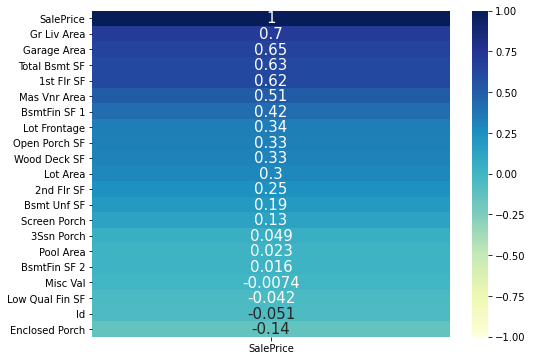

In [302]:
plt.figure(figsize=(8,6))
sns.heatmap(continous_columns.corr()[['SalePrice']].sort_values(by="SalePrice",
       ascending=False),
           annot=True,
           cmap='YlGnBu',
           annot_kws={'fontsize':15},
           vmin=-1, vmax=1, );

In [363]:
def over_fifty(train, test):
    
    # All of the continous features in the dataset
    continous_columns = ['Id', 'Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 
                             'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
                             'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 
                             'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']
    
    train = train[continous_columns]
    test = test[continous_columns[:-1]]
    
    # All of the features over .60 correlation
    corr_over_fifty_cols = train.columns[train.corr()['SalePrice'] > .60] # Credit to Eric Heidbreder
    
    # Training correlation over .50
    final_df_train = train[corr_over_fifty_cols[:-1]]
    final_df_train = final_df_train.join(train['Id'])
    
    # Reorder the columns so 'Id' is first
    cols = list(final_df_train.columns)
    cols = [cols[-1]] + cols[:-1]
    final_df_train = final_df_train[cols]

    # Testing correlation over .50
    final_df_test = test[corr_over_fifty_cols[:-1]]
    final_df_test = final_df_test.join(test['Id'])
    
    # Reorder the columns so 'Id' is first
    cols = list(final_df_test.columns)
    cols = [cols[-1]] + cols[:-1]
    final_df_test = final_df_test[cols]
    
# NAN VALUE REPLACEMENT WITH MEAN
    # Train
    for _ in final_df_train:
        if final_df_train[_].isna().sum() > 0:
            final_df_train[_].fillna(np.mean(final_df_train[_]), inplace = True)

    # Test 
    for j in final_df_test:
        if final_df_test[j].isna().sum() > 0:
            final_df_test[j].fillna(np.mean(final_df_test[j]), inplace = True)

#     print(train.isna().sum())
#     print(test.isna().sum())
    
    # Send out the csv to main merging function
    final_df_train.to_csv('../project_2-master/datasets/continous_train.csv', index=False)
    final_df_test.to_csv('../project_2-master/datasets/continous_test.csv', index=False)
    
    return final_df_test

In [364]:
over_fifty(train_df, test_df)

,Id,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area
0,2658,1020,908,1928,440
1,2718,1967,1967,1967,580
2,2414,654,664,1496,426
3,1989,968,968,968,480
4,625,1394,1394,1394,514
...,...,...,...,...,...
873,1662,1084,1084,1877,488
874,1234,1104,1104,1988,480
875,1373,952,1211,1211,322
876,1672,864,864,864,528
